# Convex Optimization

## HW1 Simulation (Q.6)

Course Supervisor: Dr Yassaee

Student Name: Seyyed Amirmahdi Sadrzadeh

Student Number: 401102015


---



Importing the necessary libraries:

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Loading the image and converting it to grayscale:

In [6]:
A = cv2.imread('Chopin.png', cv2.IMREAD_GRAYSCALE).astype(np.float64)

Performing SVD decomposition:

In [7]:
U, S, Vt = np.linalg.svd(A, full_matrices=False)

Reconstructing and displaying the images for different k values:

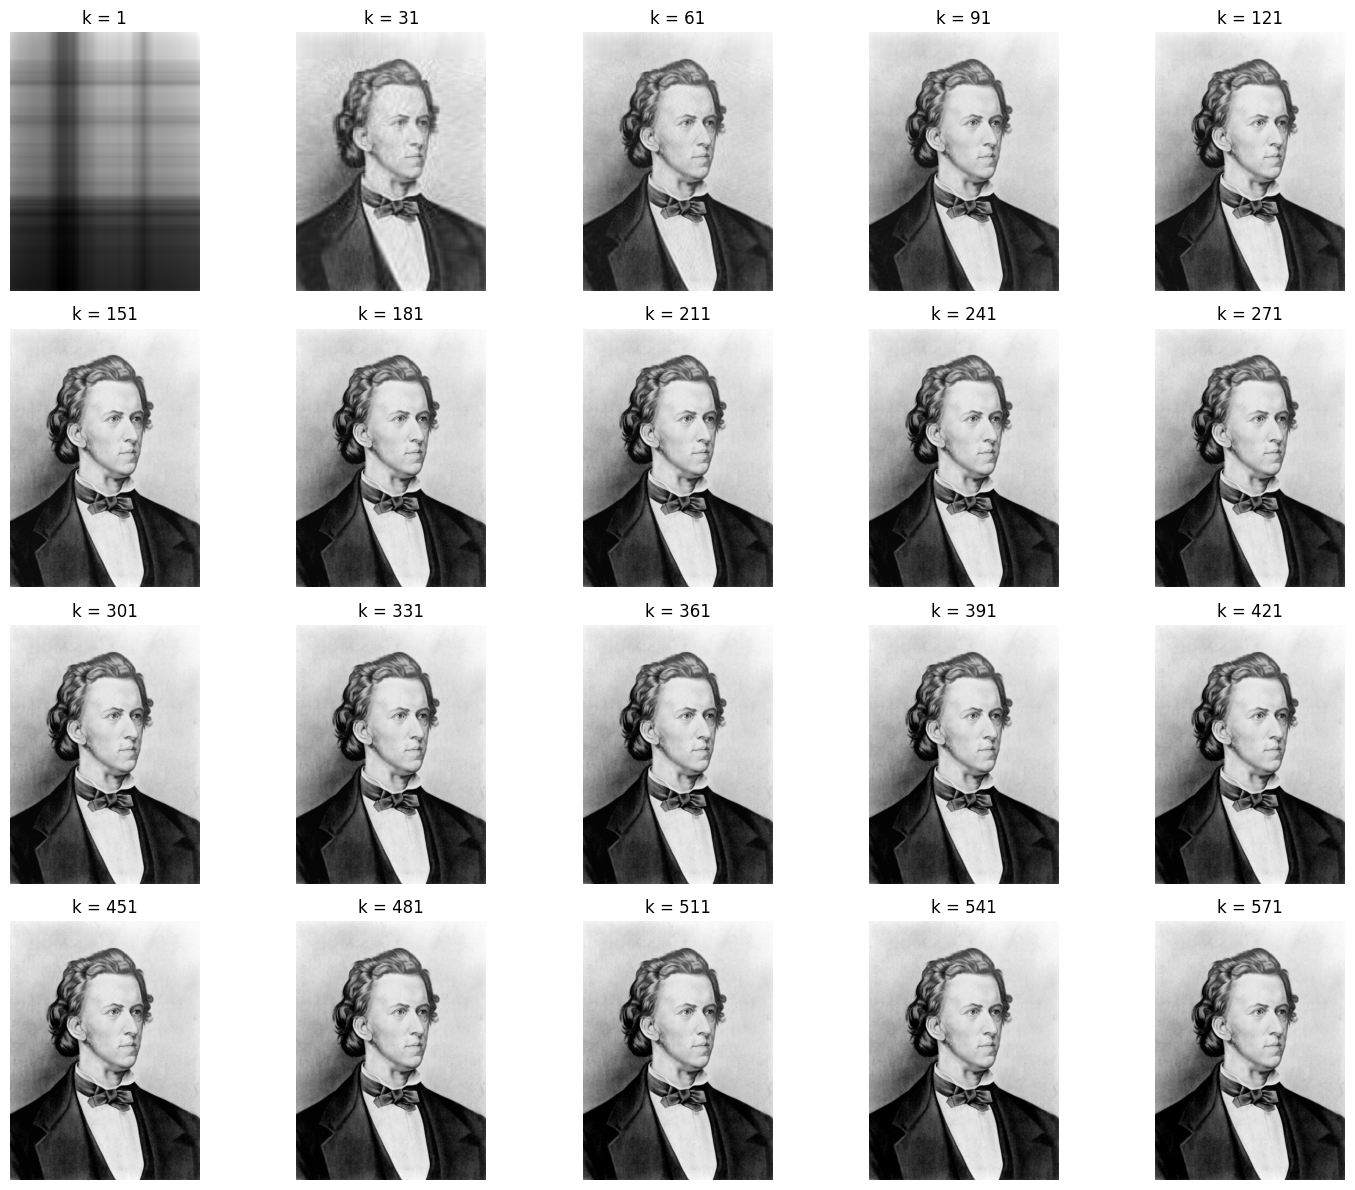

In [9]:
num_cols = 5
num_rows = int(np.ceil(len(k_values) / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
axes = axes.flatten()

for i, k in enumerate(k_values):
    A_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    axes[i].imshow(A_k, cmap='gray')
    axes[i].set_title(f'k = {k}')
    axes[i].axis('off')

# Hide unused subplots
for i in range(len(k_values), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Computing error:

In [10]:
k_values = np.arange(1, 588)
errors = []

for k in k_values:
    A_k = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
    errors.append(np.linalg.norm(A - A_k, 'fro'))

Plotting error vs rank:

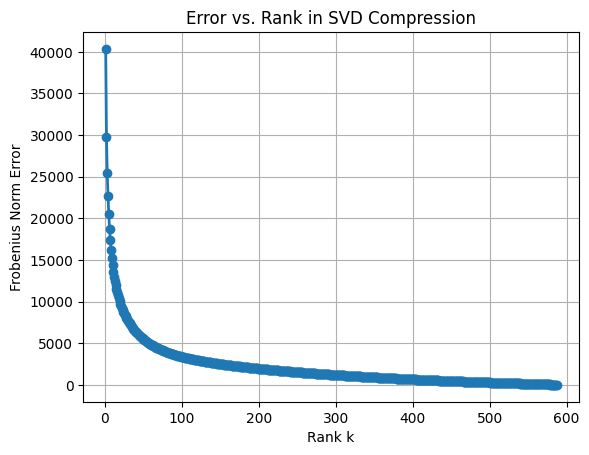

In [11]:
plt.figure()
plt.plot(k_values, errors, '-o', linewidth=2)
plt.xlabel('Rank k')
plt.ylabel('Frobenius Norm Error')
plt.title('Error vs. Rank in SVD Compression')
plt.grid(True)
plt.show()

Computing the energy rotation for k = 60:

In [12]:
k = 60
A_60 = np.dot(U[:, :k], np.dot(np.diag(S[:k]), Vt[:k, :]))
energy = np.linalg.norm(A_60, 'fro')
percentage_of_energy = (energy / np.linalg.norm(A, 'fro')) * 100

print(f'Energy retained for k=60: {percentage_of_energy:.2f}%')

Energy retained for k=60: 99.91%
